In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving bank-full.csv to bank-full.csv


In [4]:
data=pd.read_csv('bank-full.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


**EDA AND DATA VIZUALIZATION**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
yes=len(data[data['y']=='yes'])
no=len(data[data['y']=='no'])

subscribed_yes=yes/(yes+no)
subscribed_no=no/(yes+no)

print('Client has subscribed a term deposit',(subscribed_yes*100))
print('Client has not subscribed a term deposit',(subscribed_no*100))

Client has subscribed a term deposit 11.698480458295547
Client has not subscribed a term deposit 88.30151954170445


<Axes: xlabel='y', ylabel='count'>

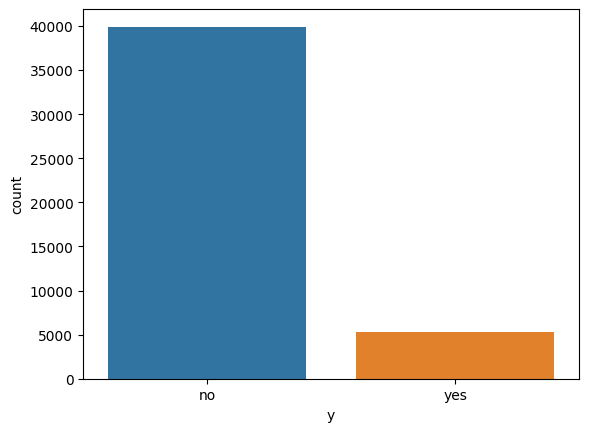

In [9]:
sns.countplot(x=data['y'])

<Axes: >

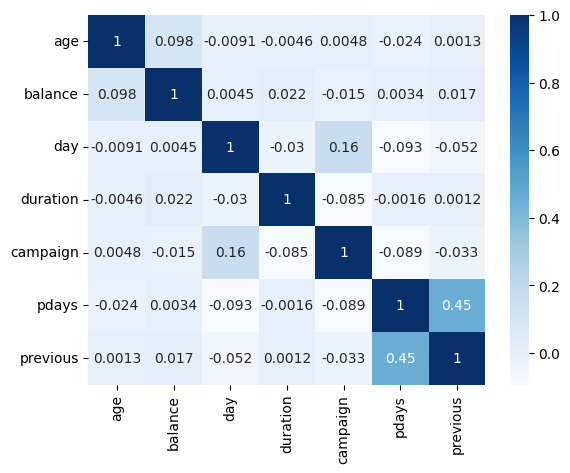

In [10]:
sns.heatmap(data.corr(), annot=True, cmap='Blues')

<function matplotlib.pyplot.show(close=None, block=None)>

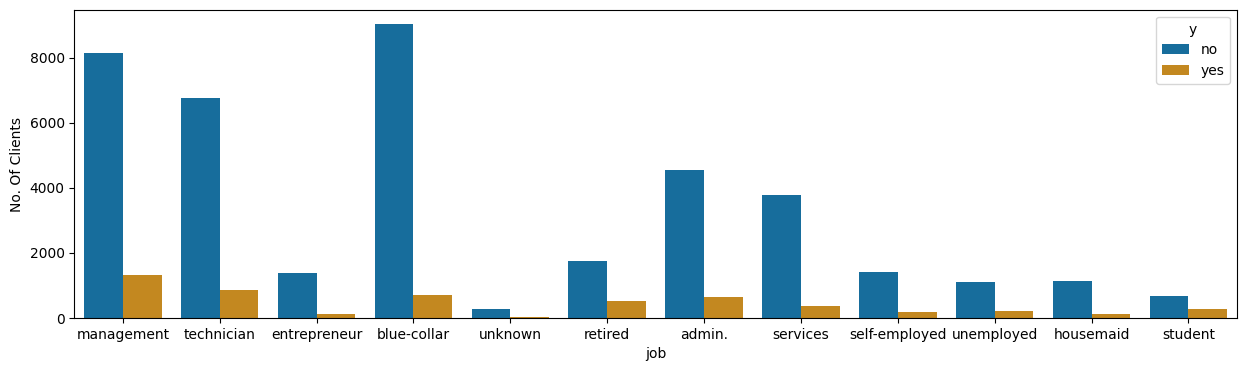

In [11]:
plt.subplots(figsize=(15,4))
sns.countplot(x ='job', hue = 'y', data = data, palette = 'colorblind')
plt.ylabel('No. Of Clients')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

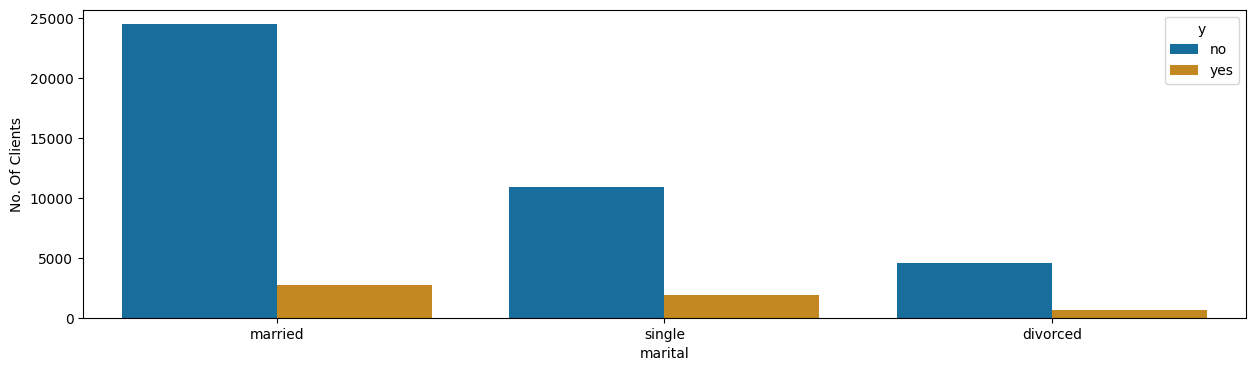

In [12]:
plt.subplots(figsize=(15,4))
sns.countplot(x ='marital', hue = 'y', data = data, palette = 'colorblind')
plt.ylabel('No. Of Clients')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

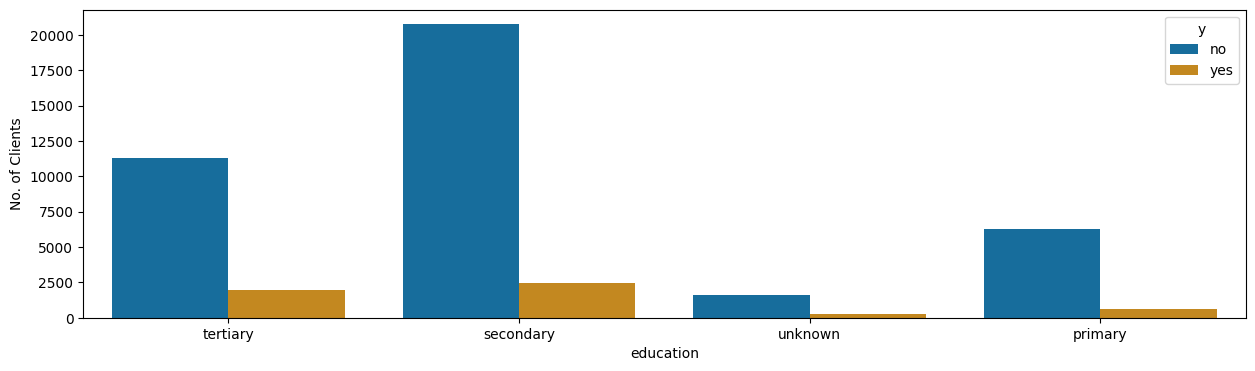

In [13]:
plt.subplots(figsize=(15,4))
sns.countplot(x = 'education', hue = 'y', data = data, palette = 'colorblind')
plt.ylabel('No. of Clients')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

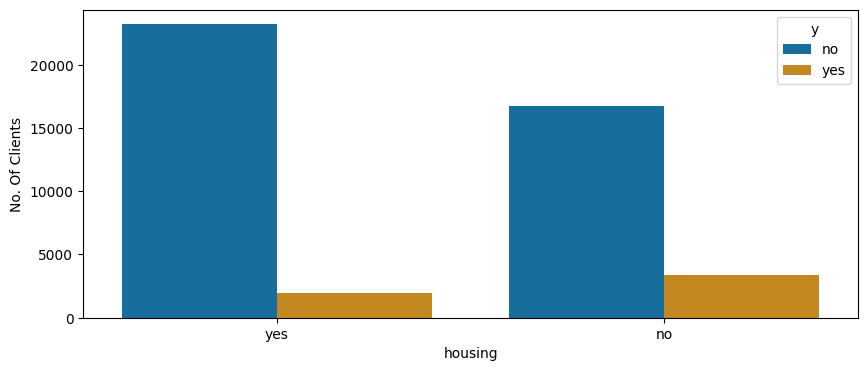

In [14]:
plt.subplots(figsize=(10,4))
sns.countplot(x ='housing', hue = 'y', data = data, palette = 'colorblind')
plt.ylabel('No. Of Clients')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

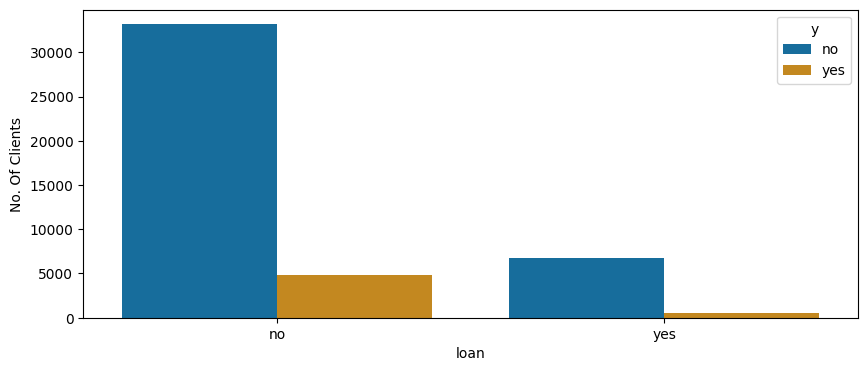

In [15]:
plt.subplots(figsize=(10,4))
sns.countplot(x ='loan', hue = 'y', data = data, palette = 'colorblind')
plt.ylabel('No. Of Clients')
plt.show

**MODEL IMPLEMENTATION**

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [17]:
for column in data.columns:
  if data[column].dtype == np.number:
    continue
  data[column] = LabelEncoder().fit_transform(data[column])
data.head()

#0=no
#1=yes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


In [18]:
X=data[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']]
Y=data['y']

In [19]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [20]:
Beta_Coefficients=pd.Series(classifier.coef_[0])
Beta_Coefficients

0    -0.017427
1     0.018552
2    -0.161200
3    -0.069510
4    -0.007020
5     0.000020
6    -0.229247
7    -0.071967
8    -0.226426
9    -0.029504
10   -0.103325
11    0.003718
12   -0.294243
13   -0.002905
14    0.158173
15   -0.364521
dtype: float64

In [21]:
Coef_df= pd.DataFrame({'Variables': ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome'], 'Beta Coefficients': Beta_Coefficients})
Coef_df

,Variables,Beta Coefficients
0,age,-0.017427
1,job,0.018552
2,marital,-0.161200
3,education,-0.069510
4,default,-0.007020
5,balance,0.000020
6,housing,-0.229247
7,loan,-0.071967
8,contact,-0.226426
9,day,-0.029504


In [22]:
classifier.intercept_

array([-0.13652318])

In [23]:
classifier.classes_

array([0, 1])

In [24]:
np.set_printoptions(suppress=True)
pred_prob=classifier.predict_proba(X)
pred_prob

array([[0.93988143, 0.06011857],
       [0.95048619, 0.04951381],
       [0.95618816, 0.04381184],
       ...,
       [0.57869763, 0.42130237],
       [0.93778246, 0.06221754],
       [0.52560544, 0.47439456]])

In [25]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
Y.values

array([0, 0, 0, ..., 1, 0, 0])

In [27]:
y_pred_df= pd.DataFrame({'Actual':Y, 'Predictions': y_pred})
y_pred_df.reset_index(inplace = True)
y_pred_df

,index,Actual,Predictions
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
45206,45206,1,0
45207,45207,1,0
45208,45208,1,0
45209,45209,0,0


In [28]:
Result=[]
for i in range(len(y_pred_df)):
    if (y_pred_df.loc[i,'Actual']==1) & (y_pred_df.loc[i,'Predictions']==1):
      Result.append('True Positive')
    elif (y_pred_df.loc[i,'Actual']==0) & (y_pred_df.loc[i,'Predictions']==0):
      Result.append('True Negative')
    elif (y_pred_df.loc[i,'Actual']==1) & (y_pred_df.loc[i,'Predictions']==0):
      Result.append('False Negative')
    elif (y_pred_df.loc[i,'Actual']==0) & (y_pred_df.loc[i,'Predictions']==1):
      Result.append('False Positive')
    else:
      Result.append('Invalid')

y_pred_df['Result']=pd.Series(Result)
y_pred_df[0:30]

y_pred_df

,index,Actual,Predictions,Result
0,0,0,0,True Negative
1,1,0,0,True Negative
2,2,0,0,True Negative
3,3,0,0,True Negative
4,4,0,0,True Negative
...,...,...,...,...
45206,45206,1,0,False Negative
45207,45207,1,0,False Negative
45208,45208,1,0,False Negative
45209,45209,0,0,True Negative


In [29]:
y_pred_df['Result'].value_counts()

True Negative     38988
False Negative     4251
True Positive      1038
False Positive      934
Name: Result, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y,y_pred)
print(CM)

[[38988   934]
 [ 4251  1038]]


<Axes: >

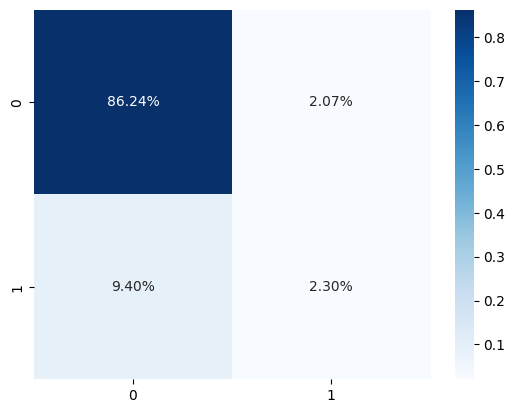

In [32]:
sns.heatmap(CM/np.sum(CM), annot=True, fmt='.2%', cmap='Blues')

In [33]:
TN =  38988
FN =  4251
TP =  1038
FP =  934

In [34]:
Sensitivity = (TP/(TP+FN))
print('Sensitivity is:',Sensitivity)

Specificity=(TN/(TN+FP))
print('Specificity is:',Specificity)

Acc=classifier.score(X,Y)
print('Accuracy is:',Acc)

Sensitivity is: 0.19625638116846283
Specificity is: 0.9766043785381494
Accuracy is: 0.885315520559156


**RECEIVER OPERATING CURVE**

0.5864303798533061


Text(0, 0.5, 'True Positive Rate')

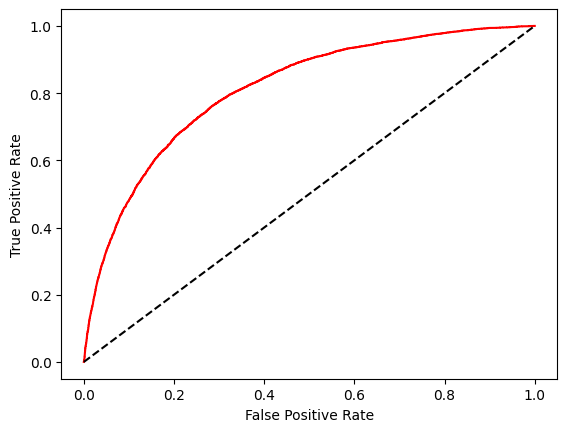

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')